# Exploring the Significance of ROC AUC in Classification Models

Within the realm of assessing the performance of classification models, the Receiver Operating Characteristic (ROC) curve and its corresponding Area Under the Curve (AUC) metric stand as pivotal tools. This exploration seeks to expound upon their practical significance by employing diverse datasets, offering a nuanced understanding of these fundamental concepts in model evaluation.

## Understanding ROC AUC: A Brief Overview

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the performance of a binary classifier model (can be used for multi class classification as well) at varying threshold values.

> ***Did you know?** The Receiver Operating Characteristic (ROC) curve originated from radar engineering during World War II. It's named for the device that detects signals from enemy objects (the "receiver") and its ability to distinguish between true signals and background noise (the "operating characteristic"). This curve illustrates the trade-off between true positive and false positive rates at various threshold settings. Its purpose was to assess receiver performance and optimize its settings. For more details, check out the Wikipedia article on the ROC curve or this Cross Validated question on its history.You can read more about the history of the ROC curve from [this Wikipedia article](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) or [this Cross Validated question](https://stats.stackexchange.com/questions/341043/what-is-the-origin-of-the-receiver-operating-characteristic-roc-terminology).*

The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting.

The ROC can also be thought of as a plot of the statistical power as a function of the Type I Error of the decision rule (when the performance is calculated from just a sample of the population, it can be thought of as estimators of these quantities). The ROC curve is thus the sensitivity or recall as a function of false positive rate.

The following confusion matrix illustrates the relationship between the true positives and false positives:

![](./TP_FP.png)

#### ROC Curve

- The ROC curve displays how well a model separates true positives from false positives at different classification thresholds.
- True Positive Rate (TPR) measures how often the model correctly identifies positives.
- False Positive Rate (FPR) calculates how often the model wrongly flags negatives.

$$ \text{TPR} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $$

$$ \text{FPR} = \frac{\text{False Positives}}{\text{False Positives + True Negatives}} $$

#### AUC

- The Area Under the Curve (AUC) summarizes the ROC curve's performance.
- AUC values range from 0 to 1, where higher values imply better discrimination ability.
- AUC = 1 signifies a perfect classifier, while AUC = 0.5 suggests random guessing.

$$ \text{AUC} = \int_{x=0}^{1} \text{TPR}(\text{FPR}^-(x)) \, d(\text{x}) $$

The ROC curve shows how well a model distinguishes between classes, while AUC quantifies this performance, aiding in understanding a model's effectiveness.

### **Example Calculation of ROC Curve and AUC**

**Given Information**

**Actual labels:** [1, 0, 1, 1, 0]

**Predicted probabilities:** [0.8, 0.6, 0.7, 0.4, 0.2]

Now, let's sort the predicted probabilities and align them with their corresponding actual labels:

| Predicted Probability | Actual Label |
|-----------------------|--------------|
| 0.8                   | 1            |
| 0.7                   | 1            |
| 0.6                   | 0            |
| 0.4                   | 1            |
| 0.2                   | 0            |

**Calculating TPR and FPR for Different Thresholds**

| Threshold | True Positives | False Positives | True Positive Rate (TPR) | False Positive Rate (FPR) |
|-----------|----------------|-----------------|--------------------------|---------------------------|
| 0.8       | 1              | 0               | 1/3 (0.33)               | 0/2 (0)                   |
| 0.7       | 2              | 0               | 2/3 (0.66)               | 0/2 (0)                   |
| 0.6       | 2              | 1               | 2/3 (0.66)               | 1/2 (0.5)                 |
| 0.4       | 3              | 1               | 3/3 (1)                  | 1/2 (0.5)                 |
| 0.2       | 3              | 2               | 3/3 (1)                  | 2/2 (1)                   |

**Plotting the ROC Curve**

| True Positive Rate (TPR) | False Positive Rate (FPR) |
|--------------------------|---------------------------|
| 1/3 (0.33)               | 0/2 (0)                   |
| 2/3 (0.66)               | 0/2 (0)                   |
| 2/3 (0.66)               | 1/2 (0.5)                 |
| 3/3 (1)                  | 1/2 (0.5)                 |
| 3/3 (1)                  | 2/2 (1)                   |

**Calculating Area Under the ROC Curve (AUC)**

To compute the AUC using the trapezoidal rule:

1. **Calculate the area of the trapezoids formed by adjacent points:**

   - **Trapezoid 1:** [(0, 0), (0, 0.67), (0.5, 0), (0.5, 0.67)] with base = 0.5 and height = 0.67.
   
     Area = base * height = 0.5 * 0.67 = 0.33

   - **Trapezoid 2:** [(0.5, 0), (0.5, 1), (1, 0), (1, 1)] with base = 0.5 and height = 1.
   
     Area = base * height = 0.5 * 1 = 0.5

2. **Sum up the areas of the trapezoids:**

   Total AUC ≈ 0.33 + 0.5 ≈ 0.83

**Conclusion:** The calculated approximate AUC for the ROC curve using the trapezoidal rule is approximately 0.83.

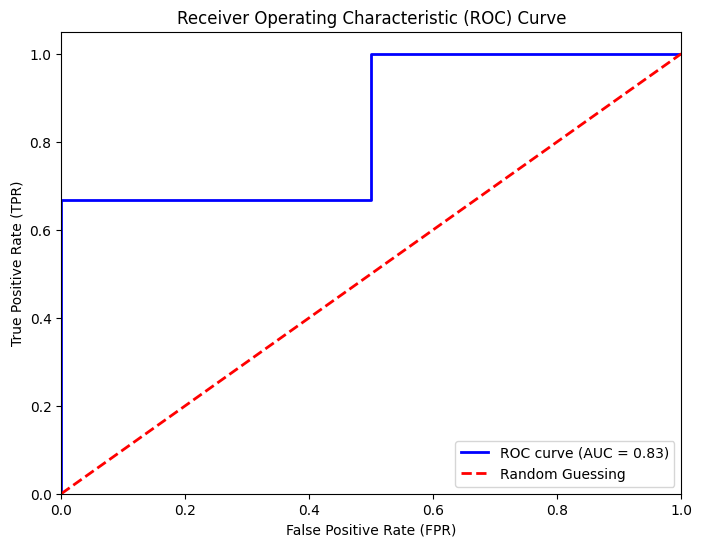

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Actual labels and predicted probabilities
actual_labels = [1, 0, 1, 1, 0]
predicted_probabilities = [0.8, 0.6, 0.7, 0.4, 0.2]

# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Analyzing Area Under the Curve (AUC) Values Across Datasets and Models

### AUC Values: Understanding Model Performance

Let's delve into the AUC values obtained across diverse datasets using different classification models.

#### Code for AUC Analysis

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def calculate_auc(dataset, dataset_name, ax):
    # Split dataset into features and target
    X = dataset["data"]["features"]
    y = dataset["data"]["targets"]
    targets = list(y[y.columns[0]].unique())
    y = (y.replace({targets[0]: 0, targets[1]: 1})).to_numpy().reshape(-1)  # Adjust target labels if needed
    
    # Identify categorical columns for encoding
    categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
    
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing: One-hot encode categorical columns
    preprocessor = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), categorical_cols)],
        remainder='passthrough'
    )
    
    # Define classification models
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('SVM', SVC(probability=True)),
        ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ]
    
    # Calculate AUC for each model
    auc_results = {}
    for name, model in models:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaling', StandardScaler(with_mean=False)), ('classifier', model)])
        pipeline.fit(X_train, y_train)
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        auc_value = roc_auc_score(y_test, y_prob)
        auc_results[name] = auc_value
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    
    auc_results['Class_Ratio 1:0'] = len(y[y == 1]) / len(y[y == 0])

    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f"ROC AUC Curves for Different Models on {dataset_name} Dataset")
    ax.legend(loc="lower right")

    return auc_results

In [4]:
htru = pd.read_csv("data/HTRU_2.csv", header=None)

htru_2 = {
   "data": {
      "features": htru.drop(8, axis=1),
      "targets": htru[8].to_frame()
   }
}

datasets = [
   (htru_2, "htru_2"),
   (fetch_ucirepo(id=222), 'bank_marketing'),  # bank_marketing
   (fetch_ucirepo(id=144), 'statlog_german_credit_data'),  # statlog_german_credit_data
   (fetch_ucirepo(id=52), 'ionosphere'),  # ionosphere
   (fetch_ucirepo(id=73), 'mushroom'),  # mushroom
   (fetch_ucirepo(id=545), 'rice_cammeo_and_osmancik'),  # rice_cammeo_and_osmancik
   (fetch_ucirepo(id=94), 'spambase'),  # spambase
   (fetch_ucirepo(id=105), 'congressional_voting_records'),  # congressional_voting_records
]

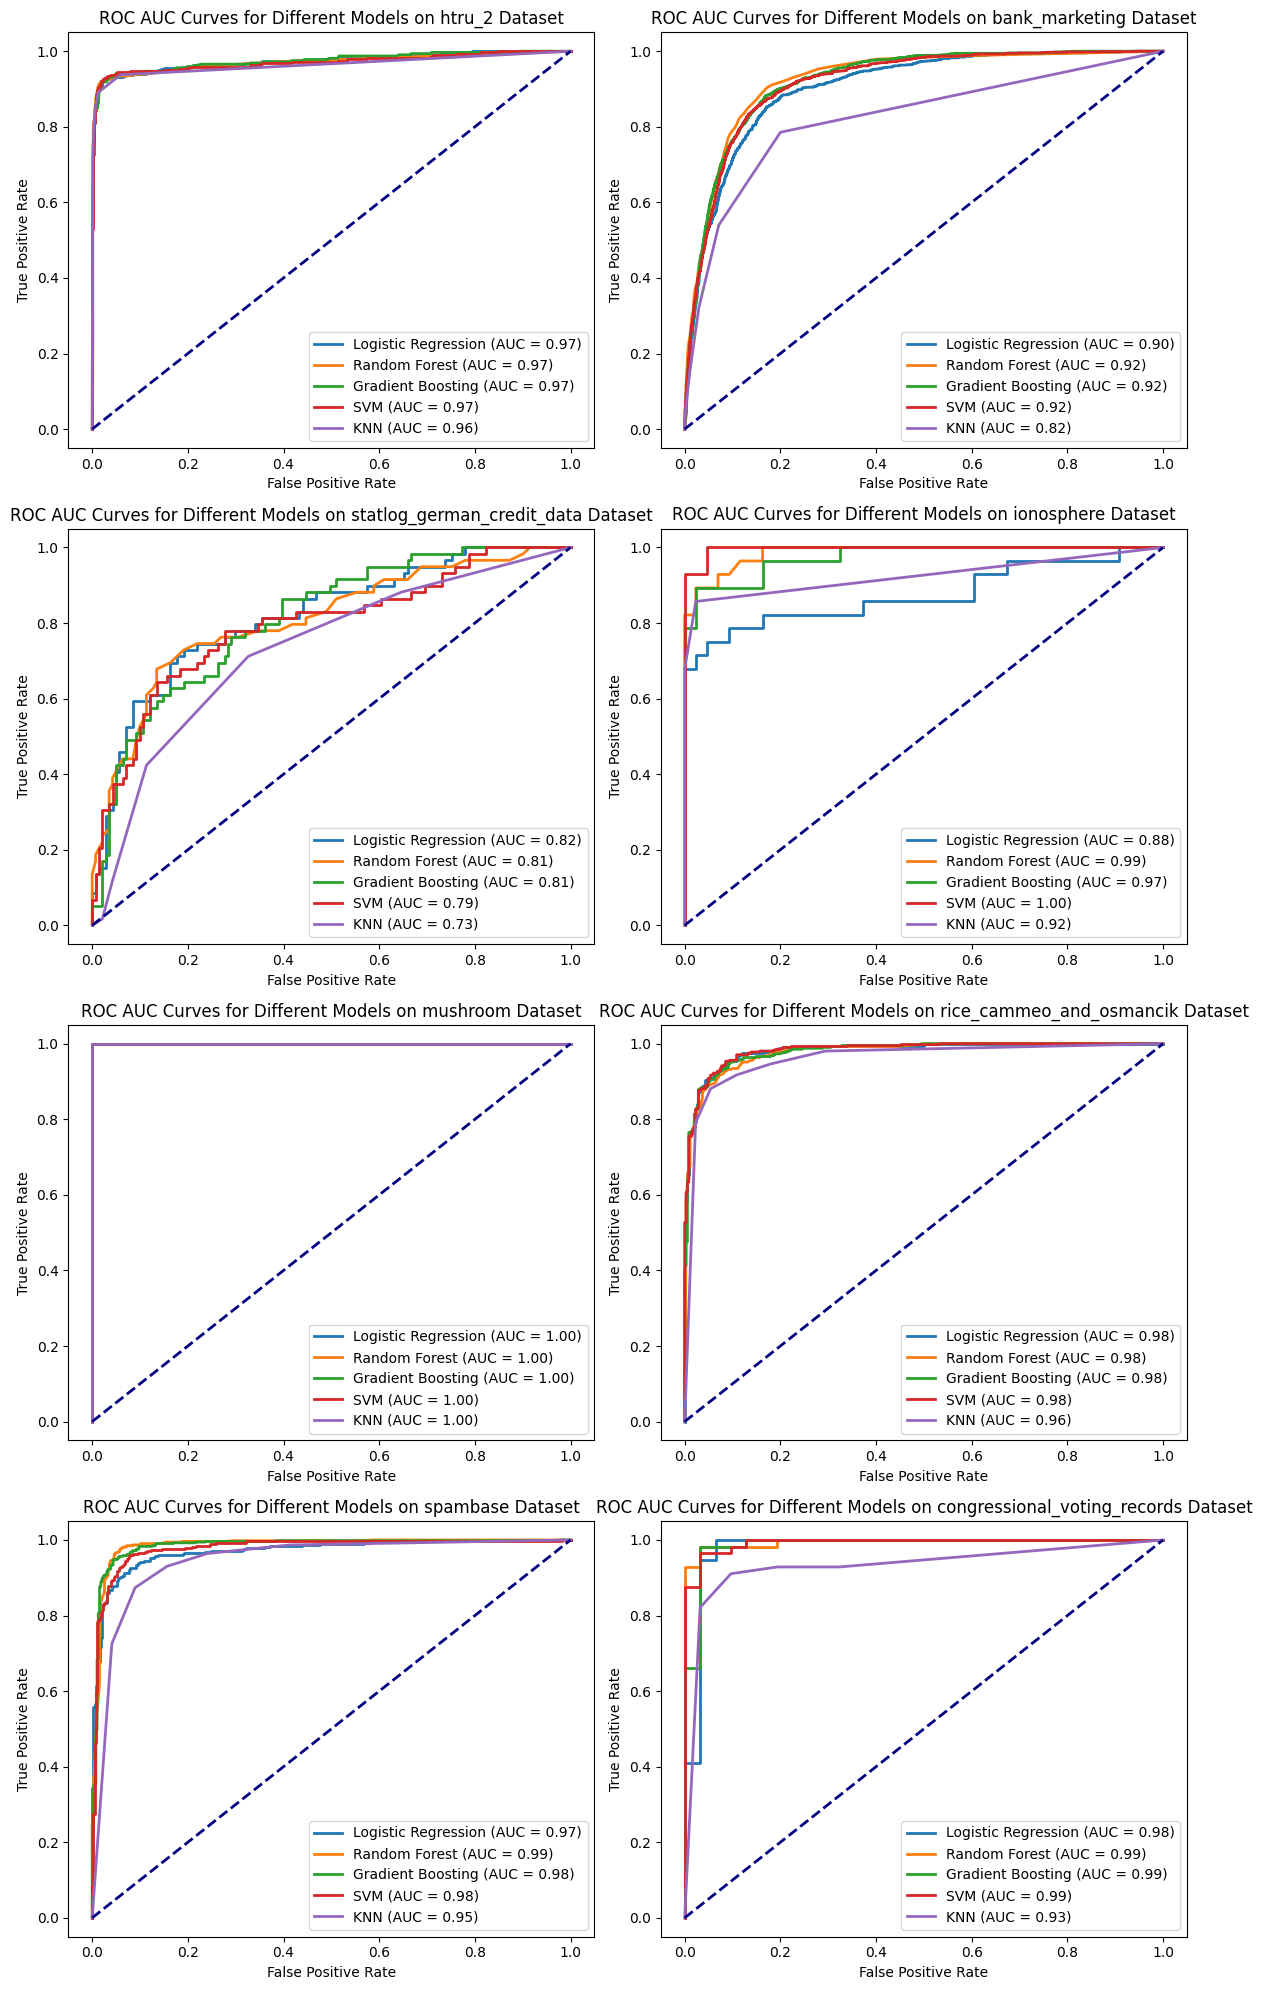

In [5]:
# Create subplots in a 4x2 grid (4 rows, 2 columns)
fig, axs = plt.subplots(4, 2, figsize=(12, 20))
axs = axs.flatten()

auc_results_dict = {}
for i, (dataset, dataset_name) in enumerate(datasets):
    auc_results_dict[dataset_name] = calculate_auc(dataset, dataset_name, axs[i])

# Hide empty subplots if there are fewer than 8 datasets
for i in range(len(datasets), len(axs)):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
# Convert the dictionary to a DataFrame for easy visualization
auc_results_df = pd.DataFrame(auc_results_dict).T

# Ensure columns are of numeric data type (float)
auc_results_df = auc_results_df.astype(float)

# Sort columns by name (if needed)
auc_results_df = auc_results_df.reindex(sorted(auc_results_df.columns), axis=1)

auc_results_df

,Class_Ratio 1:0,Gradient Boosting,KNN,Logistic Regression,Random Forest,SVM
htru_2,0.100806,0.973845,0.964026,0.974464,0.970874,0.971288
bank_marketing,0.132483,0.921774,0.822823,0.904550,0.924950,0.917207
statlog_german_credit_data,0.428571,0.812237,0.729475,0.817887,0.808090,0.794687
ionosphere,0.560000,0.974252,0.924834,0.875415,0.986296,0.996678
mushroom,1.074566,1.000000,1.000000,1.000000,1.000000,1.000000
rice_cammeo_and_osmancik,1.337423,0.979414,0.959702,0.981969,0.977521,0.982153
spambase,1.537783,0.984449,0.945009,0.971433,0.985448,0.978449
congressional_voting_records,1.589286,0.987327,0.931164,0.979263,0.994816,0.993088


### Interpretation of AUC Values

1. **Consistently High AUC:**
   - Most models exhibit consistently high AUC values across various datasets.
   - However, relying solely on AUC for model comparison might not distinguish between models effectively due to consistently high scores.

2. **Challenge of Class Imbalance:**
   - Imbalanced datasets, highlighted in the 'Class_Ratio 1:0' column, pose challenges.
   - Models with high AUC might struggle to accurately predict minority classes, impacting real-world applicability.

3. **Beyond AUC Evaluation:**
   - Supplementary metrics like precision, recall, and F1-score, along with techniques like precision-recall curves, become crucial, particularly in imbalanced datasets.
   - Consideration of domain-specific knowledge guides model selection beyond AUC reliance.

4. **Comprehensive Model Evaluation:**
   - Emphasis on a comprehensive evaluation strategy considering class imbalance impact and multiple relevant metrics beyond AUC for informed model selection and performance assessment.

## Precision, Recall, and F1-score: Complementary Metrics to ROC AUC

In addition to ROC AUC, evaluating classification models involves considering precision, recall, and the F1-score, providing nuanced insights into a model's performance in specific scenarios.


### Precision
Precision gauges the accuracy of positive predictions made by the model, measuring the ratio of true positives to the total predicted positives. Higher precision implies fewer false positives, making it crucial when minimizing false identifications is a priority.

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

### Recall (Sensitivity)
Recall evaluates the model's ability to correctly identify all positive instances, calculating the ratio of true positives to the actual positives. Higher recall indicates capturing a larger proportion of actual positive instances, essential in scenarios where missing positives is a greater concern.

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

### F1-score
The F1-score, a harmonic mean of precision and recall, offers a balanced assessment by considering false positives and false negatives. It becomes valuable when both precision and recall are equally important and provides a single metric summarizing their trade-offs.

$$ \text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

When to Prioritize Precision, Recall, and F1-score over ROC AUC:

- **Precision:** When minimizing false positives is critical, e.g., medical diagnoses where avoiding misdiagnoses is crucial.
- **Recall:** In scenarios prioritizing capturing all positive instances, like identifying fraud in financial transactions.
- **F1-score:** When seeking a balance between precision and recall is essential, offering a consolidated metric.

These metrics serve as complementary tools to ROC AUC, offering specific insights into different aspects of a model's performance, allowing for informed decision-making based on specific priorities and constraints in various real-world applications.

## Conclusion

In summary, the Receiver Operating Characteristic (ROC) curve and its corresponding Area Under the Curve (AUC) metric serve as pivotal elements in assessing the performance of classification models. These tools offer valuable insights into a model's ability to distinguish between classes, aiding in informed decision-making across diverse domains.

Their significance transcends various applications, enabling stakeholders to make informed choices aligned with specific objectives and contextual needs. ROC AUC facilitates model comparison, guiding the selection of appropriate algorithms for distinct real-world scenarios. Ultimately, its practical significance lies in enhancing the understanding and evaluation of classification model performance, enabling better-informed decisions in various domains and applications.